In [1]:
from nsepy import get_history
from datetime import date
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import darts 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from darts.timeseries import TimeSeries
from darts.models import Theta
from darts.metrics import mape
import seaborn as sns
%matplotlib inline
%autosave 1
plt.rcParams["figure.figsize"] = (20,10)

Importing plotly failed. Interactive plots will not work.


Autosaving every 1 seconds


In [2]:
today = date.today()
ticker = get_history(symbol="NIFTY", 
                    start=date(1980,1,1), 
                    end=today,
                    index=True,
                    )
ticker.dropna(inplace=True)
ticker

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
1997-01-01,905.2,941.4,905.2,939.55,38948210.0,9782100000.0
1997-01-02,941.95,944.0,925.05,927.05,49118380.0,11504200000.0
1997-01-03,924.3,932.6,919.55,931.65,35263845.0,8667400000.0
1997-01-06,932.45,937.95,925.65,927.8,26323660.0,6655100000.0
1997-01-07,926.35,935.15,922.25,928.8,44473415.0,10500500000.0
...,...,...,...,...,...,...
2022-01-18,18337.2,18350.95,18085.9,18113.05,227507319.0,208526699999.999969
2022-01-19,18129.2,18129.2,17884.9,17938.4,276662654.0,253101900000.0
2022-01-20,17921.0,17943.7,17648.45,17757.0,258094246.0,258632900000.0


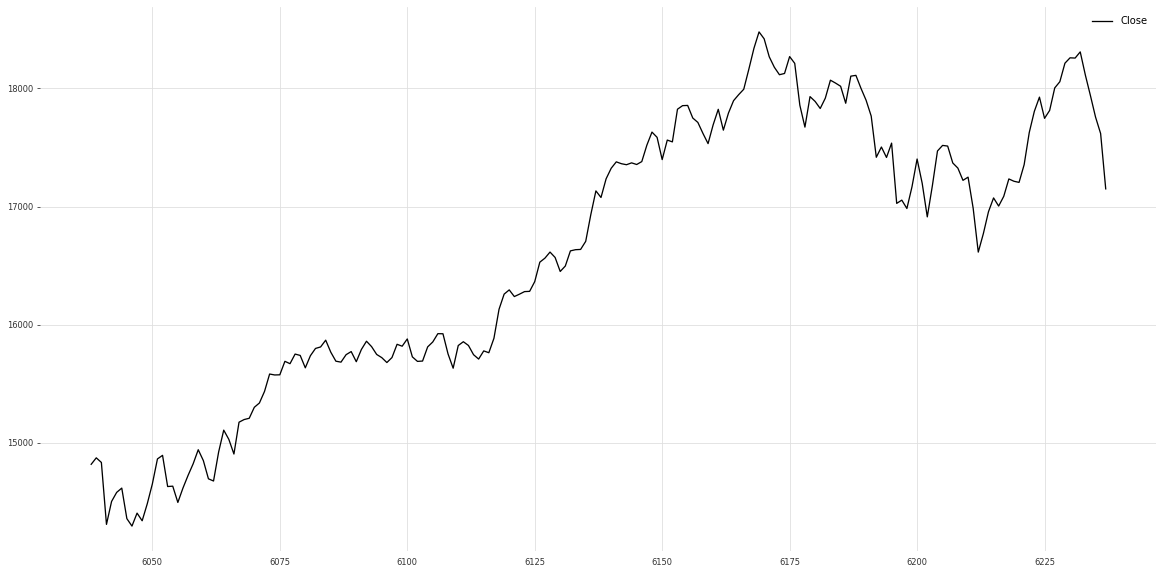

In [3]:
ticker = pd.DataFrame(ticker['Close'])
ticker.reset_index(drop=True,inplace=True)
ticker[-200::].plot();

In [15]:
length = int(len(ticker)*(.80))
train, val = data_timeseries[:length], data_timeseries[length:]

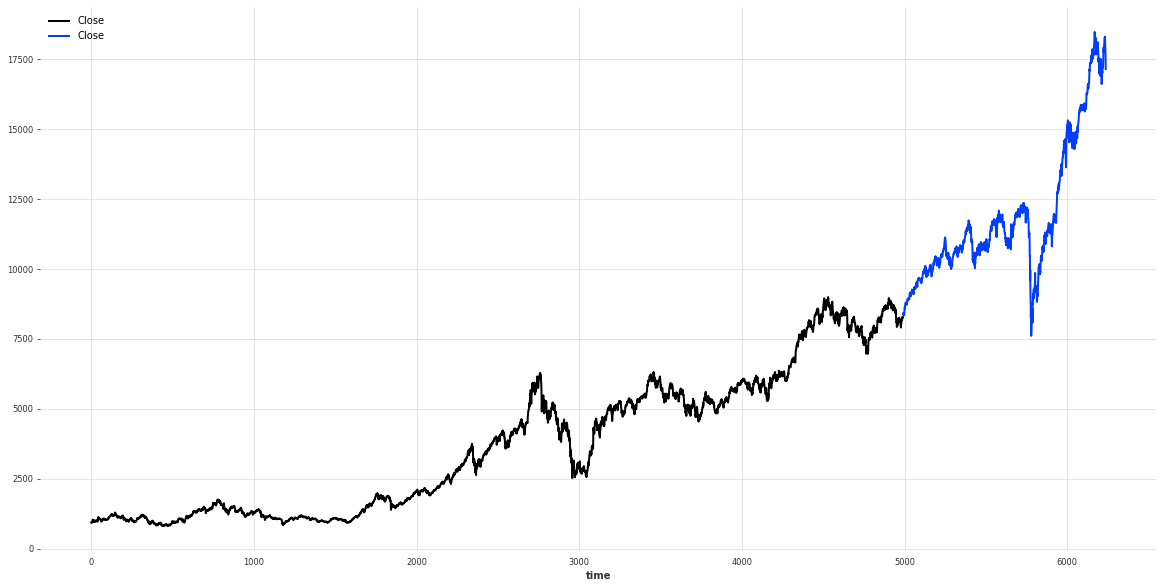

In [16]:
train.plot()
val.plot();

In [ ]:
# https://snyk.io/advisor/python/nbeats-forecast

  0%|          | 0/6127 [00:00<?, ?it/s]

MAPE = 9.47%


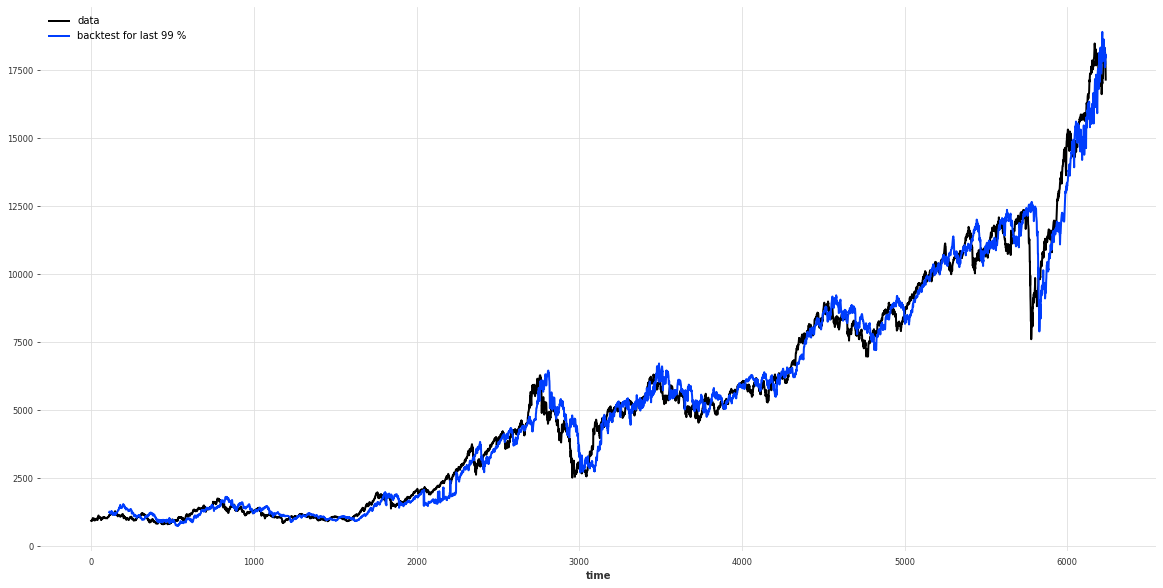

In [11]:
test_for_recent_percentage_data = 99                           

historical_fcast_theta = best_theta_model.historical_forecasts(data_timeseries,
                                                               start=(100-test_for_recent_percentage_data)/100,
                                                               forecast_horizon=50,
                                                               verbose=True)

data_timeseries.plot(label='data')
historical_fcast_theta.plot(label=f"backtest for last {test_for_recent_percentage_data} %")
print('MAPE = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))

MAPE = 9.47%


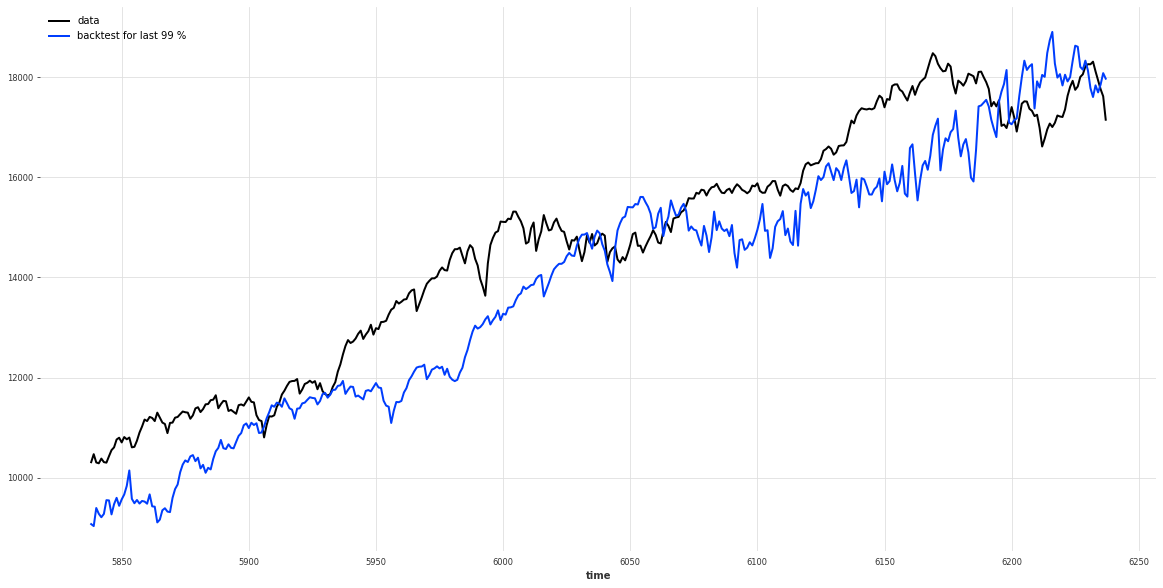

In [14]:
t = -400
data_timeseries[t:].plot(label='data')
historical_fcast_theta[t:].plot(label=f"backtest for last {test_for_recent_percentage_data} %")
print('MAPE = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))